In [1]:
%matplotlib inline

import pathlib

import numpy as np
import matplotlib.pyplot as plt

from rtlsdr_receiver_flowgraph import rtlsdr_receiver_flowgraph

# Some nice defaults for figures
plt.rcParams['figure.figsize'] = (7, 3.5)
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
# Example of how to run the flowgraph
fg = rtlsdr_receiver_flowgraph(duration=3, iq_file_output='/tmp/reu-recording')
fg.run()

gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.10.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
[INFO] [UHD] linux; GNU C++ version 13.2.1 20230801; Boost_108300; UHD_4.6.0.0-0-unknown
Found Rafael Micro R820T tuner
Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
[R82XX] PLL not locked!
log :info: Generating /tmp/reu-recording.sigmf-meta, writing SigMF data to /tmp/reu-recording.sigmf-data
vmcircbuf_sysconfig :info: Using gr::vmcircbuf_sysv_shm_factory


In [3]:
# We have access to the Vector Sink as a Python object
fg.spectrum_vector_sink

In [4]:
# We can fetch the data
# Documentation:
# https://wiki.gnuradio.org/index.php/Vector_Sink
# https://github.com/gnuradio/gnuradio/blob/main/gr-blocks/include/gnuradio/blocks/vector_sink.h
fg.spectrum_vector_sink.data()

[7.674560546875,
 5.368264675140381,
 4.970090866088867,
 5.351622581481934,
 7.716632843017578,
 8.473321914672852,
 11.74927043914795,
 12.178935050964355,
 9.311005592346191,
 8.546866416931152,
 9.089274406433105,
 8.582389831542969,
 9.212363243103027,
 7.541333198547363,
 8.031560897827148,
 7.988138675689697,
 10.067717552185059,
 10.91317081451416,
 8.088452339172363,
 6.190383434295654,
 7.116611957550049,
 6.878444194793701,
 8.832122802734375,
 9.904546737670898,
 10.418136596679688,
 10.311427116394043,
 9.53573989868164,
 10.806652069091797,
 9.539356231689453,
 7.162538528442383,
 8.024049758911133,
 10.530052185058594,
 10.15501594543457,
 8.943038940429688,
 8.47471809387207,
 8.653621673583984,
 8.93036937713623,
 11.51148509979248,
 12.764928817749023,
 12.94256591796875,
 7.620107650756836,
 4.861565589904785,
 7.700837135314941,
 10.887316703796387,
 10.805989265441895,
 10.22980785369873,
 9.598739624023438,
 8.51284408569336,
 8.54996109008789,
 10.406023025512695

In [5]:
# Convert spectrum sink data to a numpy array
spectrum = np.array(fg.spectrum_vector_sink.data()).reshape(-1, fg.nfft)
spectrum.shape

(2, 65536)

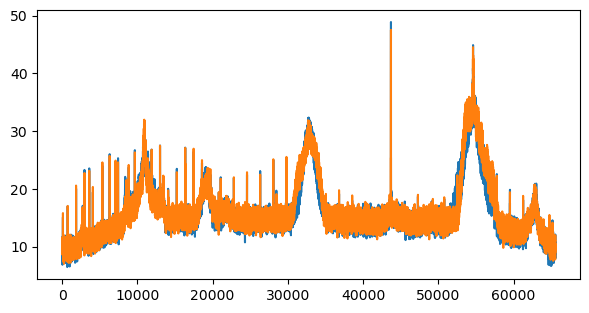

In [6]:
plt.plot(10 * np.log10(spectrum[0]))
plt.plot(10 * np.log10(spectrum[1]))

In [7]:
# Destroy the flowgraph to release access to the RTL-SDR
del fg

In [8]:
# An example "observation"

frequencies_to_scan = [98e6, 95.5e6, 117.5e6, 425e6, 801e6, 935e6, 1090e6]
freq_xlating_freqs = [800e3, 300e3, -200e3, -250e3, 300e3, 200e3, 0]
duration = 10

spectrum_data = {}
output_dir = pathlib.Path('/tmp/observation')
output_dir.mkdir(exist_ok=True)

for rf_freq, xlating_freq in zip(frequencies_to_scan, freq_xlating_freqs):
    print(f'Receiving on {rf_freq * 1e-6:.3f} MHz (tune to {xlating_freq*1e-3:.1f} kHz)')
    iq_file = str(output_dir / f'iq_data_{rf_freq * 1e-6:.3f}')
    fg = rtlsdr_receiver_flowgraph(
        duration=duration, frequency=rf_freq, freq_xlating_frequency=xlating_freq,
        iq_file_output=iq_file)
    fg.run()
    spectrum_data[rf_freq] = np.array(fg.spectrum_vector_sink.data()).reshape(-1, fg.nfft)
    del fg

Receiving on 98.000 MHz (tune to 800.0 kHz)


gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.10.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
[R82XX] PLL not locked!
log :info: Generating /tmp/observation/iq_data_98.000.sigmf-meta, writing SigMF data to /tmp/observation/iq_data_98.000.sigmf-data


Receiving on 95.500 MHz (tune to 300.0 kHz)


gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.10.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
[R82XX] PLL not locked!
log :info: Generating /tmp/observation/iq_data_95.500.sigmf-meta, writing SigMF data to /tmp/observation/iq_data_95.500.sigmf-data


Receiving on 117.500 MHz (tune to -200.0 kHz)


gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.10.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
[R82XX] PLL not locked!
log :info: Generating /tmp/observation/iq_data_117.500.sigmf-meta, writing SigMF data to /tmp/observation/iq_data_117.500.sigmf-data


Receiving on 425.000 MHz (tune to -250.0 kHz)


gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.10.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
[R82XX] PLL not locked!
log :info: Generating /tmp/observation/iq_data_425.000.sigmf-meta, writing SigMF data to /tmp/observation/iq_data_425.000.sigmf-data


Receiving on 801.000 MHz (tune to 300.0 kHz)


gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.10.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
[R82XX] PLL not locked!
log :info: Generating /tmp/observation/iq_data_801.000.sigmf-meta, writing SigMF data to /tmp/observation/iq_data_801.000.sigmf-data


Receiving on 935.000 MHz (tune to 200.0 kHz)


gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.10.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
[R82XX] PLL not locked!
log :info: Generating /tmp/observation/iq_data_935.000.sigmf-meta, writing SigMF data to /tmp/observation/iq_data_935.000.sigmf-data


Receiving on 1090.000 MHz (tune to 0.0 kHz)


gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.10.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
[R82XX] PLL not locked!
log :info: Generating /tmp/observation/iq_data_1090.000.sigmf-meta, writing SigMF data to /tmp/observation/iq_data_1090.000.sigmf-data


In [9]:
spectrum_data

{98000000.0: array([[11.35165501, 11.72451496, 10.25689316, ..., 11.14782906,
          9.1005373 , 10.46255207],
        [ 8.27913952,  7.76386023,  7.62495661, ..., 10.36876965,
          9.45180416,  8.51155281],
        [ 8.38028145,  9.23774338,  8.28679657, ..., 11.78181267,
         10.31422615,  7.89291716],
        ...,
        [ 7.65774727,  8.2476244 ,  9.86256218, ...,  9.9937439 ,
          9.18972397,  8.23181534],
        [ 8.81802177,  8.82538223,  9.87880993, ...,  8.95313931,
          7.26063442,  9.32376003],
        [11.67403793, 12.15372467, 12.50357342, ..., 11.43494415,
          9.68912029,  8.01863289]]),
 95500000.0: array([[ 6.88382864,  6.60589838,  6.39636564, ...,  8.56417179,
          7.24725771,  6.3498745 ],
        [ 6.24317598,  6.9118495 ,  8.38376999, ...,  5.252563  ,
          5.31058502,  7.13608646],
        [ 7.46126986,  7.34066296,  8.87294579, ...,  5.34802055,
          6.95290518,  8.23854065],
        ...,
        [11.68338966, 11.39500

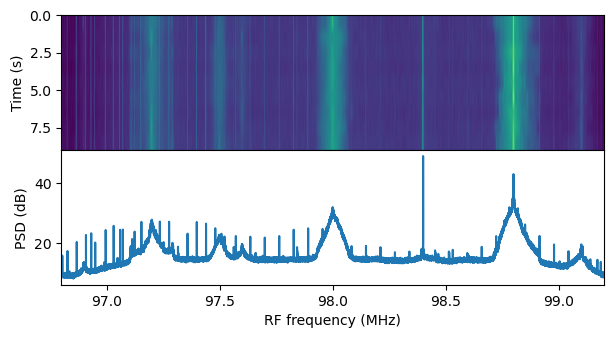

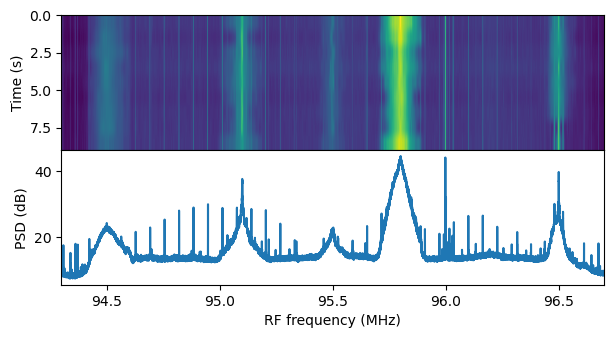

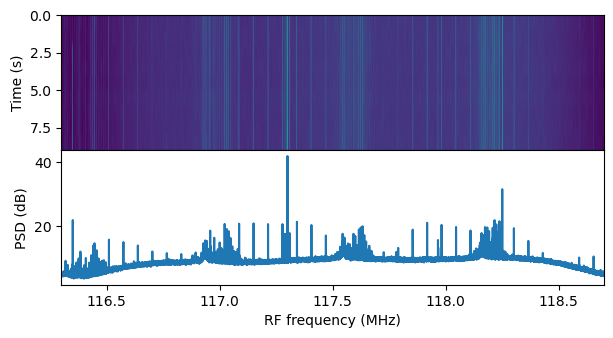

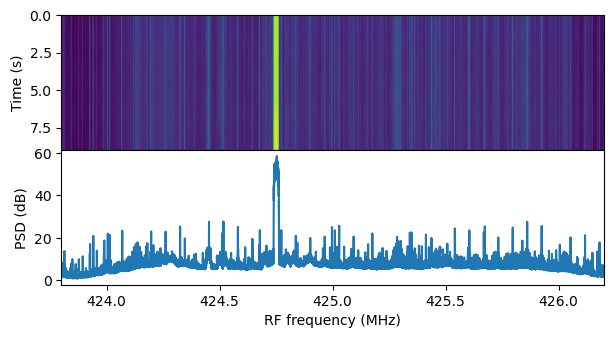

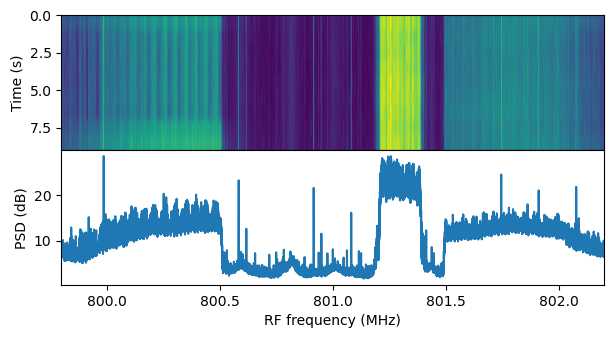

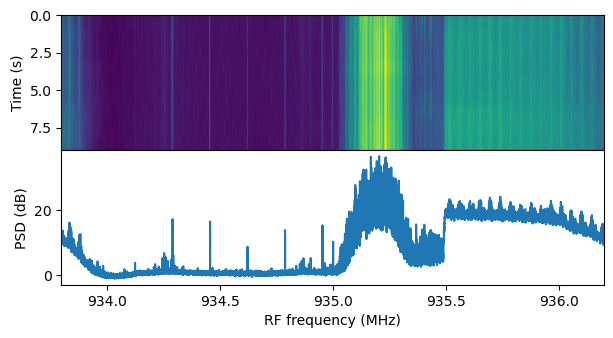

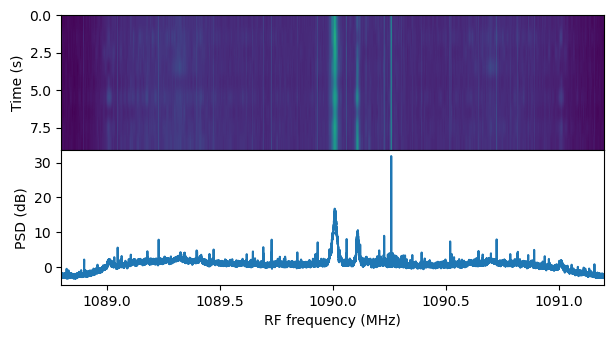

In [10]:
# Display the results
samp_rate = 2.4e6
waterfall_freq_reduce = 64
for freq, data in spectrum_data.items():  
    freq_axis = np.fft.fftshift(np.fft.fftfreq(data.shape[1], 1 / samp_rate))
    fig, axs = plt.subplots(2, 1, sharex=True)
    waterfall = np.max(data.reshape(data.shape[0], -1, waterfall_freq_reduce), axis=-1)
    axs[0].imshow(10*np.log10(waterfall), aspect='auto',
                  extent=[1e-6 * (freq - samp_rate/2), 1e-6 * (freq + samp_rate/2),
                          data.shape[0], 0])
    axs[1].plot(1e-6 * (freq_axis + freq), 10*np.log10(np.average(data, axis=0)))
    plt.subplots_adjust(hspace=0)
    axs[1].set_xlabel('RF frequency (MHz)')
    axs[1].set_ylabel('PSD (dB)')
    axs[0].set_ylabel('Time (s)')